# Imports

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import phonecalls as pc
import asanisi as an
import copy
import os


plt.rcParams['figure.figsize'] = (20, 10)
markers = ['o', 'v', 's', 'P', '*', 'X', 'd', 'x', 'D', '2', '+']

# Getting Data

In [2]:
%time mit_calls = pc.allcalls('CallLog.csv', (), 'participantID.A', 'number.hash', ['local_time'], "%Y-%m-%d %H:%M:%S", header=True, min_activity=1)
mit_calls.head()

CPU times: user 427 ms, sys: 38.8 ms, total: 465 ms
Wall time: 465 ms


,ego,alter,time,uclock,aclock
0,fa10-01-19,10153fa58c24d1a2eb54b3c6ac39482acb61131c,2010-12-31 16:44:24,307,0
1,fa10-01-22,101b96d65031e2792acd950125d90cf9ff30b5ac,2011-05-23 20:59:05,450,0
2,fa10-01-12,1023b616632f3ba048b2f1d1374788bfa0444a8d,2011-01-22 14:01:07,328,0
3,fa10-01-01,102c517fc9ecf84975448470893c3799f5588c8a,2011-05-27 17:52:56,454,0
4,fa10-01-07,102cd812edb5689302bcc57df8330cff44727bd1,2011-04-04 10:02:50,400,0


In [3]:
%time mit_pairs = pc.pairs(mit_calls)
mit_pairs.head()

CPU times: user 40.6 ms, sys: 479 µs, total: 41.1 ms
Wall time: 40.3 ms


,ego,alter,nij,k,n
0,fa10-01-01,102c517fc9ecf84975448470893c3799f5588c8a,1,516,3339
1,fa10-01-01,abac98a7f6c000a6600c0e9cc370b059a874c3fd,1,516,3339
2,fa10-01-01,b8bc40aefbb724dfbacb3fd296cbb10b2dd35a85,6,516,3339
3,fa10-01-01,b8b0f0fc34d4201df3ebb5ebcefbbb61a3499941,1,516,3339
4,fa10-01-01,b8af4e561030e5a28b441467ede33b9450dd8518,1,516,3339


In [4]:
%time mit_lives = pc.lives_dictionary(mit_calls)
# just to show how an entry looks like
mit_lives['fa10-01-01']['102c517fc9ecf84975448470893c3799f5588c8a']

CPU times: user 149 ms, sys: 551 µs, total: 150 ms
Wall time: 149 ms


{'t0': 454, 'tf': 454, 'nij': 1, 'ell': 0}

In [5]:
%time mit_calls = pc.remove_alters(mit_calls, mit_lives, 210) # only keep alters and phone calls appeared after 7 months, counting from the start of the data
mit_calls.head()

/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['uclock'] -= num_days


CPU times: user 2.24 s, sys: 26.5 ms, total: 2.27 s
Wall time: 2.27 s


,ego,alter,time,uclock,aclock
0,fa10-01-19,10153fa58c24d1a2eb54b3c6ac39482acb61131c,2010-12-31 16:44:24,97,0
1,fa10-01-22,101b96d65031e2792acd950125d90cf9ff30b5ac,2011-05-23 20:59:05,240,0
2,fa10-01-12,1023b616632f3ba048b2f1d1374788bfa0444a8d,2011-01-22 14:01:07,118,0
3,fa10-01-01,102c517fc9ecf84975448470893c3799f5588c8a,2011-05-27 17:52:56,244,0
4,fa10-01-07,102cd812edb5689302bcc57df8330cff44727bd1,2011-04-04 10:02:50,190,0


In [6]:
%time mit_pairs = pc.pairs(mit_calls)
%time mit_lives = pc.lives_dictionary(mit_calls)

CPU times: user 33.5 ms, sys: 36 µs, total: 33.5 ms
Wall time: 32.4 ms
CPU times: user 115 ms, sys: 372 µs, total: 115 ms
Wall time: 115 ms


# Get $F$

This is a required step to obtain $b$

In [28]:
%time fall = pc.get_f(mit_calls, 'all', 180, 60)

/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by='time', inplace=True)
/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['alpha'] = df3['aclock'] // bina


CPU times: user 20.9 s, sys: 10.8 ms, total: 20.9 s
Wall time: 20.9 s


# From $F$ to $b$

In [8]:
%time blamb = an.get_b(fall, 'lambda')
%time blambplot = an.plot_g(blamb, mit_lives, 'lambda', 60)

CPU times: user 1.62 s, sys: 10.1 ms, total: 1.63 s
Wall time: 1.62 s
CPU times: user 19.5 ms, sys: 0 ns, total: 19.5 ms
Wall time: 18.9 ms


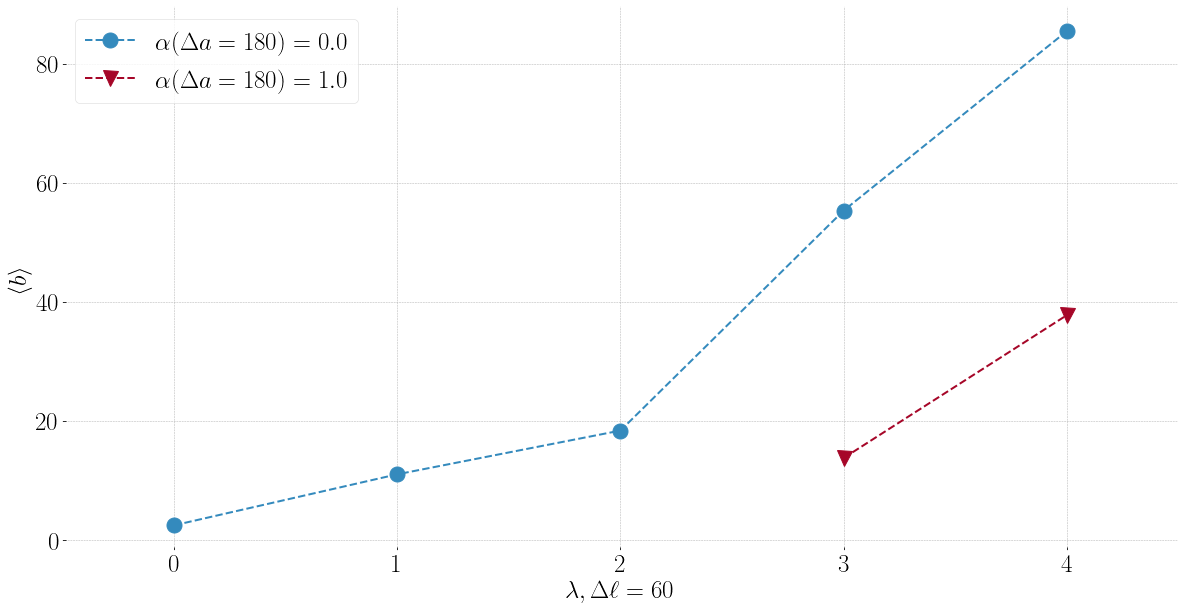

In [9]:
plt.xlabel(r"$\lambda, \Delta \ell = 60$")
plt.ylabel(r"$\langle b \rangle$")
plt.xlim(-0.5, 4.5)
plt.xticks(range(5))
for a in blambplot.keys():
    plt.plot(blambplot[a].index, blambplot[a]['lambda'], marker=markers[int(a)], markersize=15, linestyle="--", label=fr"$\alpha(\Delta a  = 180) = {a}$")
plt.legend()

In [10]:
%time fall2 = pc.get_f(mit_calls, 'all', mit_lives, 60, 180)
%time bal = an.get_b(fall2, 'alpha')
%time balplot = an.plot_g(bal, mit_lives, 'alpha', 180)

CPU times: user 55 s, sys: 116 ms, total: 55.1 s
Wall time: 55.1 s
CPU times: user 1.51 s, sys: 6.66 ms, total: 1.52 s
Wall time: 1.52 s
CPU times: user 21.7 ms, sys: 0 ns, total: 21.7 ms
Wall time: 21.6 ms


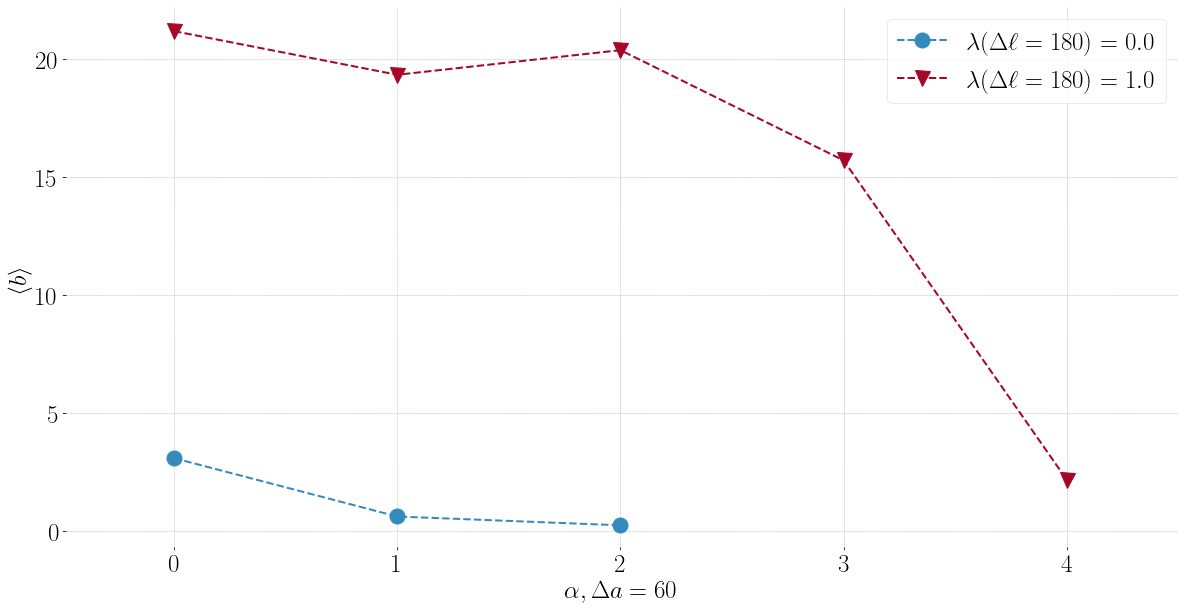

In [11]:
plt.xlabel(r"$\alpha, \Delta a = 60$")
plt.ylabel(r"$\langle b \rangle$")
plt.xlim(-0.5, 4.5)
plt.xticks(range(5))
for a in balplot.keys():
    plt.plot(balplot[a].index, balplot[a]['alpha'], marker=markers[int(a)], markersize=15, linestyle="--", label=fr"$\lambda(\Delta \ell  = 180) = {a}$")
plt.legend()

# Distributions of lifetime separated by $b$

Separated by activity. I will do this as a test using only $b$; but the idea is that evetually I'll use $F$

In [10]:
egolist = list(mit_calls['ego'].unique())

In [13]:
pd.set_option('mode.chained_assignment', None)

In [14]:
%time fall = pc.get_f(mit_calls, 'all', 60, 7)

CPU times: user 54.6 s, sys: 73.9 ms, total: 54.7 s
Wall time: 54.6 s


In [15]:
%time blamb = an.get_b(fall, 'lambda')

CPU times: user 2.99 s, sys: 3.24 ms, total: 2.99 s
Wall time: 2.99 s


In [16]:
allb = []
for ego in blamb.keys():
    df = blamb[ego].loc[blamb[ego]['alpha'] == 1]
    for i in df.index:
        allb.append(df.at[i, 'g'])
        
[max(allb), min(allb), len(allb)]

[360.0, 0.25, 1182]

How to decide on the bins for $b$? For now, I will try to arbitrarily choose based on the distribution.

In [17]:
test = {}
for i in range(4):
    test[i] = {}
    
for ego in blamb.keys():
    df = blamb[ego].loc[blamb[ego]['alpha'] == 1]
    for i in df.index:
        lamb = df.at[i, 'lambda']
        b = df.at[i, 'g']
        test[3][lamb] = test[3].get(lamb, 0) + 1
        if b < 17:
            test[0][lamb] = test[0].get(lamb, 0) + 1
        elif (b >= 17) and (b < 34):
            test[1][lamb] = test[1].get(lamb, 0) + 1
        else:
            test[2][lamb] = test[2].get(lamb, 0) + 1

for i in test.keys():
    test[i] = pd.DataFrame.from_dict(test[i], orient='index')
    test[i].sort_index(inplace=True)

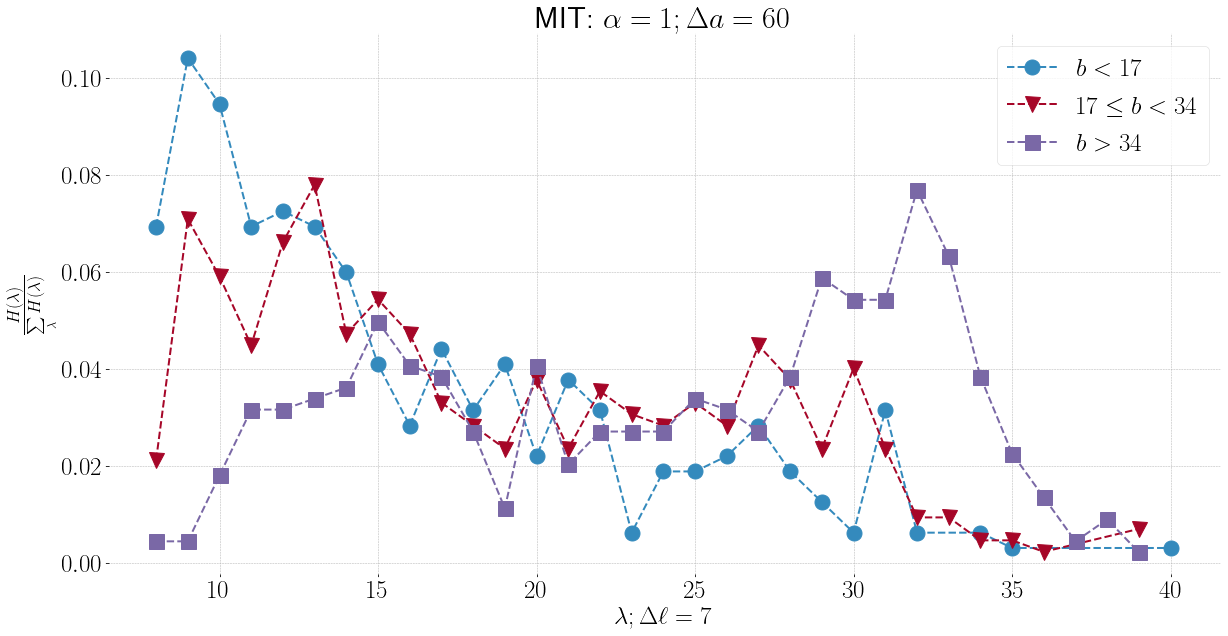

In [24]:
legends = [r"$b < 17$", r"$17 \leq b < 34$", r"$b > 34$", r"All $b$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(test[i].index, test[i][0] / sum(test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

But I could also choose bins in terms of the perrcentiles (33, 66, 100)

In [19]:
p33, p66 = np.percentile(allb, 33), np.percentile(allb, 66)

In [22]:
test = {}
for i in range(4):
    test[i] = {}
    
for ego in blamb.keys():
    df = blamb[ego].loc[blamb[ego]['alpha'] == 1]
    for i in df.index:
        lamb = df.at[i, 'lambda']
        b = df.at[i, 'g']
        test[3][lamb] = test[3].get(lamb, 0) + 1
        if b < p33:
            test[0][lamb] = test[0].get(lamb, 0) + 1
        elif (b >= p33) and (b < p66):
            test[1][lamb] = test[1].get(lamb, 0) + 1
        else:
            test[2][lamb] = test[2].get(lamb, 0) + 1

for i in test.keys():
    test[i] = pd.DataFrame.from_dict(test[i], orient='index')
    test[i].sort_index(inplace=True)

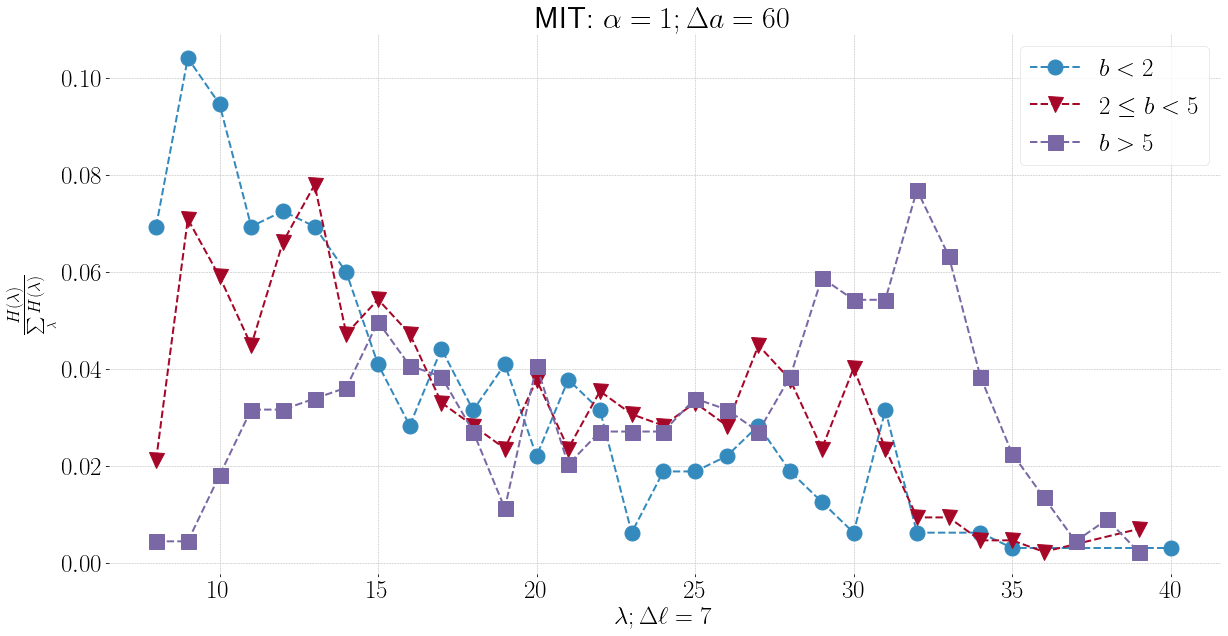

In [23]:
legends = [fr"$b < {int(p33)}$", fr"${int(p33)} \leq b < {int(p66)}$", fr"$b > {int(p66)}$", r"All $b$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(test[i].index, test[i][0] / sum(test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

# Distributions of lifetime separated by $F$

In [ ]:
for ego in fall.keys():
    for alter in fall[ego].keys():
        df = fall[ego][alter]
        #print(list(df['lambda']))

In [38]:
allf = []
for ego in fall.keys():
    for alter in fall[ego].keys():
        df = fall[ego][alter].loc[fall[ego][alter]['alpha'] == 1]
        for i in df['lambda']:
            allf.append(i)
        
[max(allf), min(allf), len(allf)]

[4, 3, 747]

In [30]:
p = [np.percentile(allf, q) for q in (33, 66)]
p

[2.0, 8.0]

(array([661.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         86.]),
 array([3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 ,
        3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19, 3.2 , 3.21,
        3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
        3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.41, 3.42, 3.43,
        3.44, 3.45, 3.

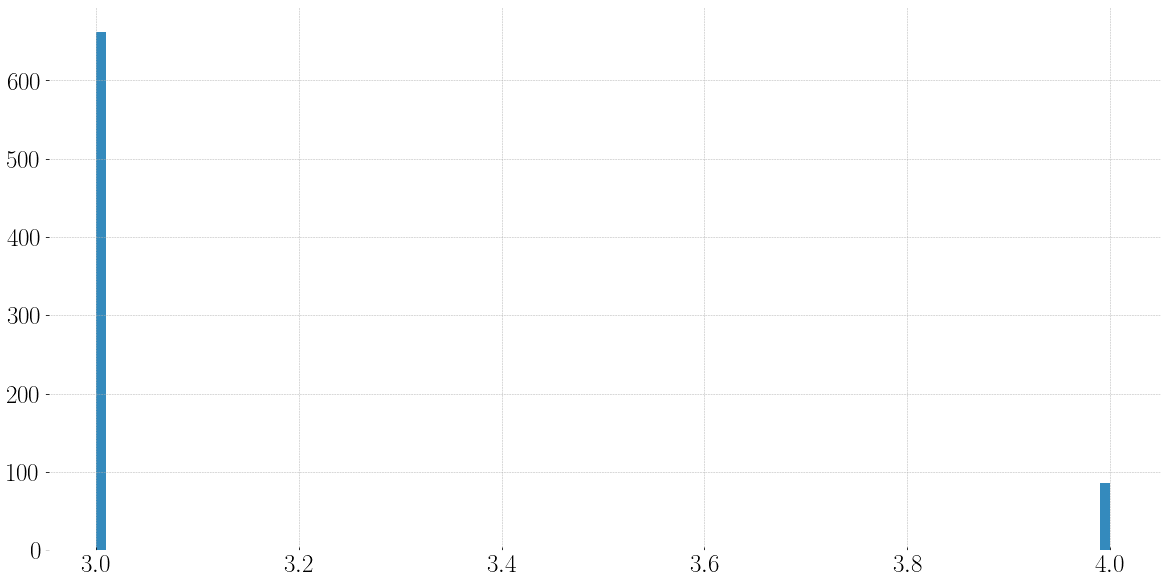

In [39]:
plt.hist(allf, bins=100)

In [62]:
test = {}
for i in range(4):
    test[i] = {}
    
for ego in bbb.keys():
    for alter in bbb[ego].keys():
        df = bbb[ego][alter].loc[bbb[ego][alter]['alpha'] == 1]
        if len(df) > 0:
            lamb = df.iloc[0]['lambda']
            test[3][lamb] = test[3].get(lamb, 0) + 1
            for f in df['f']:
                if f < 17:
                    test[0][lamb] = test[0].get(lamb, 0) + 1
                elif (f >= 17) and (f < 34):
                    test[1][lamb] = test[1].get(lamb, 0) + 1
                else:
                    test[2][lamb] = test[2].get(lamb, 0) + 1

for i in test.keys():
    test[i] = pd.DataFrame.from_dict(test[i], orient='index')
    test[i].sort_index(inplace=True)

In [63]:
legends = [fr"$b < {int(p33)}$", fr"${int(p33)} \leq b < {int(p66)}$", fr"$b > {int(p66)}$", r"All $b$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(test[i].index, test[i][0] / sum(test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

NameError: name 'p33' is not defined

In [41]:
test[3]

,0
25,20
26,93
27,83
28,80
29,79
30,77
31,78
32,83
33,54
34,40


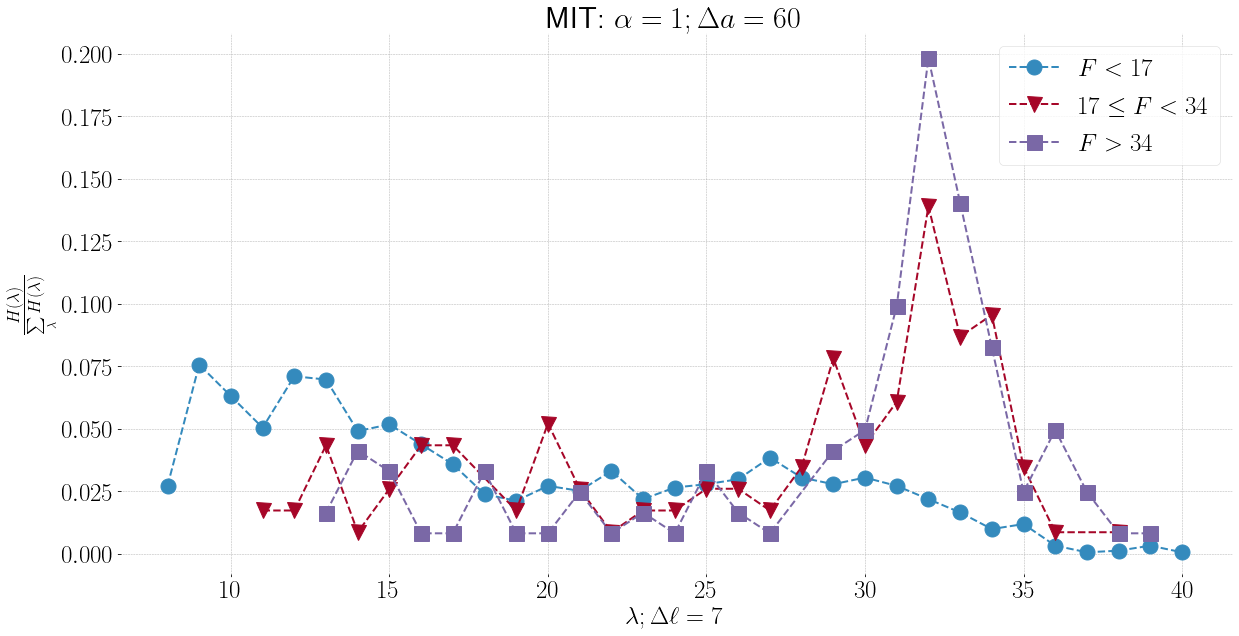

In [64]:
legends = [r"$F < 17$", r"$17 \leq F < 34$", r"$F > 34$", r"All $F$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(test[i].index, test[i][0] / sum(test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

# Testing functions

In [44]:
def get_f(callsdf, theego, lives_dict, bina, binell):
    '''
    This method outputs a dataframe with one row per (a, ell) combination, and the number
    of phone calls ego made to alters with that combination of parameters. The arguments are
    callsdf             : a dataframe produces with the "allcalls" or "remove_alters" methods
    theego              : specify an ego for results only using it. If the 'all' argument is
                        passed, it will calculate a dataframe per ego
    lives_dict          : dictionary produces with the "lives_dictionary" method
    bina                : the value for \Delta a
    binell              : \Delta ell
    '''
    if theego != 'all':
        df1 = callsdf.loc[callsdf['ego'] == theego]
    else:
        df1 = copy.deepcopy(callsdf)

    f = {}
    for ego in df1['ego'].unique():
        f[ego] = {}
        df2 = df1.loc[df1['ego'] == ego]
        for alter in df2['alter'].unique():
            f[ego][alter] = pd.DataFrame()
            df3 = df2.loc[df2['alter'] == alter]
            alla = set([i // bina for i in df3['aclock'].unique()])
            lamb = lives_dict[ego][alter]['ell'] // binell
            idx = 0
            for a in alla:
                f[ego][alter].at[idx, 'lamb'] = lamb
                f[ego][alter].at[idx, 'alpha'] = a
                idx += 1
            f[ego][alter]['f'] = 0
            for c in df3.index:
                a = df3.at[c, 'aclock']  // bina
                iidx = list(f[ego][alter].loc[f[ego][alter]['alpha'] == a].index)[0]
                f[ego][alter].at[iidx, 'f'] += 1

    return f

In [45]:
%time aaa = get_f(mit_calls, 'all', mit_lives, 60, 7)

CPU times: user 52.4 s, sys: 55.4 ms, total: 52.5 s
Wall time: 52.5 s


In [52]:
counter = 0
for ego in aaa.keys():
    for alter in aaa[ego].keys():
        df = aaa[ego][alter]
        print(list(df['lamb']))
        counter += 1
        if counter == 20:
            break
    if counter  == 20:
        break

[0.0]
[32.0, 32.0, 32.0, 32.0]
[0.0]
[0.0]
[19.0, 19.0, 19.0]
[30.0, 30.0, 30.0]
[0.0]
[0.0]
[34.0, 34.0, 34.0, 34.0, 34.0]
[28.0, 28.0, 28.0, 28.0]
[1.0]
[18.0, 18.0, 18.0]
[0.0]
[31.0, 31.0, 31.0, 31.0]
[3.0]
[0.0]
[0.0]
[0.0]
[0.0]
[27.0, 27.0, 27.0]


In [57]:
def get_f2(callsdf, theego, bina, binell):
    '''
    This method outputs a dataframe with one row per (a, ell) combination, and the number
    of phone calls ego made to alters with that combination of parameters. The arguments are

    callsdf             : a dataframe produces with the "allcalls" or "remove_alters" methods
    theego              : specify an ego for results only using it. If the 'all' argument is
                        passed, it will calculate a dataframe per ego
    lives_dict          : dictionary produces with the "lives_dictionary" method
    bina                : the value for \Delta a
    binell              : \Delta ell
    '''
    if theego != 'all':
        df1 = callsdf.loc[callsdf['ego'] == theego]
    else:
        df1 = callsdf.copy()

    f = {}
    for ego in df1['ego'].unique():
        f[ego] = {}
        df2 = df1.loc[df1['ego'] == ego]
        for alter in df2['alter'].unique():
            df3 = df2.loc[df2['alter'] == alter]
            df3.sort_values(by='time', inplace=True)
            lamb = (df3.iloc[-1]['uclock'] - df3.iloc[0]['uclock']) // binell
            df3['alpha'] = df3['aclock'] // bina
            tmp = df3.groupby('alpha').size()
            f[ego][alter] = pd.DataFrame({'lambda': lamb, 'alpha': tmp.index, 'f': tmp})
            f[ego][alter].reset_index(drop=True, inplace=True)
    return f

In [58]:
%time bbb = get_f2(mit_calls, 'all', 60, 7)

<ipython-input-57-d921b27b02ab>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by='time', inplace=True)
<ipython-input-57-d921b27b02ab>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['alpha'] = df3['aclock'] // bina


CPU times: user 21 s, sys: 8.74 ms, total: 21 s
Wall time: 21 s


In [61]:
counter = 0
for ego in bbb.keys():
    for alter in bbb[ego].keys():
        df = bbb[ego][alter]
        print(list(df['lambda']))
        counter += 1
        if counter == 20:
            break
    if counter  == 20:
        break

[0]
[32, 32, 32, 32]
[0]
[0]
[19, 19, 19]
[30, 30, 30]
[0]
[0]
[34, 34, 34, 34, 34]
[28, 28, 28, 28]
[1]
[18, 18, 18]
[0]
[31, 31, 31, 31]
[3]
[0]
[0]
[0]
[0]
[27, 27, 27]


In [138]:
a = mit_calls.groupby(['ego', 'alter'])[['aclock']].min().rename(columns={'aclock': 't0'})
b = mit_calls.groupby(['ego', 'alter'])[['aclock']].max().rename(columns={'aclock': 'tf'})

In [139]:
c = mit_calls.groupby(['ego', 'alter'])[['aclock']].count().rename(columns={'aclock': 'nij'})

In [140]:
d = a.merge(b, left_index=True, right_index=True)
d = d.merge(c, left_index=True, right_index=True)

In [141]:
d['ell'] = d['tf'] - d['t0']

In [155]:
%time aaa = pc.lives_dictionary(mit_calls)

CPU times: user 7.63 s, sys: 2.94 ms, total: 7.63 s
Wall time: 7.63 s


In [160]:
%time bbb = ld(mit_calls)

CPU times: user 128 ms, sys: 0 ns, total: 128 ms
Wall time: 127 ms


In [15]:
aaa[egolist[0]][alist[1]]

NameError: name 'aaa' is not defined

In [162]:
bbb[egolist[0]][alist[1]]['ell']

227

In [19]:
alist = list(fall[egolist[0]].keys())
fall[egolist[0]][alist[1]]

,lambda,alpha,f
0,3,0,25
1,3,1,2


In [66]:
aa = pd.DataFrame({1: ['a', 'a', 'b', 'c', 'c', 'c'], 2: 'hhhh', 3: list(range(6))})
aa

,1,2,3
0,a,hhhh,0
1,a,hhhh,1
2,b,hhhh,2
3,c,hhhh,3
4,c,hhhh,4
5,c,hhhh,5


In [ ]:
aa.groupby(1)